In [49]:
data.to_csv('cleaned_data.csv', index=False) # type: ignore

6. Save Cleaned Data
- Save the cleaned and transformed dataset for model training.

In [48]:
data['total_special_chars_url'] = ( # type: ignore
    data['qty_dot_url'] + data['qty_hyphen_url'] + data['qty_underline_url'] # type: ignore
)

5. Feature Engineering
    - Combine or transform columns to add more meaningful features (e.g., total_special_chars_url = qty_dot_url + qty_hyphen_url + ...).

In [47]:
correlation_matrix = data.corr() # type: ignore
correlation_with_target = correlation_matrix['phishing'].sort_values(ascending=False)
print(correlation_with_target)

phishing                      1.000000
qty_slash_directory           0.746454
qty_questionmark_directory    0.745644
qty_questionmark_file         0.745644
qty_slash_file                0.745644
                                ...   
qty_plus_domain                    NaN
qty_asterisk_domain                NaN
qty_hashtag_domain                 NaN
qty_dollar_domain                  NaN
qty_percent_domain                 NaN
Name: phishing, Length: 112, dtype: float64


4. Correlation Analysis
    - Identify features with high correlation to the target variable (phishing).

In [46]:
from imblearn.over_sampling import SMOTE

X = data.drop('phishing', axis=1) # type: ignore
y = data['phishing'] # type: ignore
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

Handle Imbalance:
Use oversampling (e.g., SMOTE) or undersampling to balance classes.

In [45]:
print(data['phishing'].value_counts(normalize=True)) # type: ignore

phishing
0    0.65428
1    0.34572
Name: proportion, dtype: float64


3. Balance the Dataset
The phishing target column has a mean of 0.3457, which suggests class imbalance.

Steps:
    - Check Class Distribution:

In [44]:
upper_limit = data['qty_dot_url'].quantile(0.95) # type: ignore
data['qty_dot_url'] = data['qty_dot_url'].clip(upper=upper_limit) # type: ignore

Cap extreme values to reduce their influence (optional).

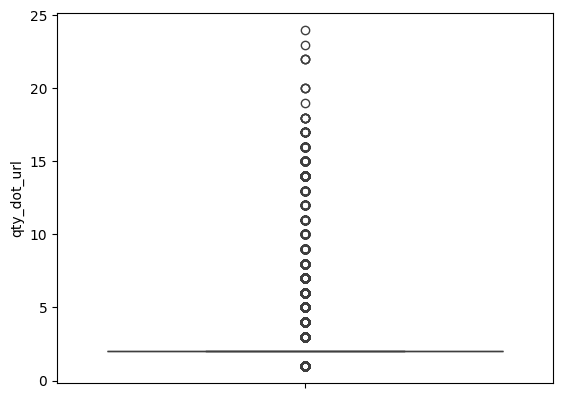

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data['qty_dot_url']) # type: ignore
plt.show()


2. Analyze Distribution of Numerical Columns
Columns like qty_dot_url, qty_hyphen_url, and others have high standard deviations compared to their means, indicating possible outliers.

Steps:
    - Visualize distributions using histograms or boxplots.

In [42]:
columns_with_negatives = ['qty_ip_resolved', 'url_google_index', 'domain_google_index', 'ttl_hostname']
for col in columns_with_negatives:
    data[col] = data[col].replace(-1, 0)  # Replace -1 with 0 (or NaN for imputation) # type: ignore


3. Handle Missing Values
    - Depending on the column and context:

Numerical Columns: Fill with mean, median, or a specific value.

In [41]:
print(data.isnull().sum()) # type: ignore

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64


4. Check for Missing Values
    - Identify columns with missing values.

In [40]:
print(data.dtypes) # type: ignore

qty_dot_url             int64
qty_hyphen_url          int64
qty_underline_url       int64
qty_slash_url           int64
qty_questionmark_url    int64
                        ...  
qty_redirects           int64
url_google_index        int64
domain_google_index     int64
url_shortened           int64
phishing                int64
Length: 112, dtype: object


3. Check Data Types
    - Verify that columns have the correct data types.

In [39]:
print(data.describe()) # type: ignore

        qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
count  88647.000000    88647.000000       88647.000000   88647.000000   
mean       2.191343        0.328810           0.113879       1.281781   
std        1.235636        1.119286           0.657767       1.893929   
min        1.000000        0.000000           0.000000       0.000000   
25%        2.000000        0.000000           0.000000       0.000000   
50%        2.000000        0.000000           0.000000       0.000000   
75%        2.000000        0.000000           0.000000       2.000000   
max       24.000000       35.000000          21.000000      44.000000   

       qty_questionmark_url  qty_equal_url    qty_at_url   qty_and_url  \
count          88647.000000   88647.000000  88647.000000  88647.000000   
mean               0.009329       0.205861      0.022133      0.140885   
std                0.112568       0.954272      0.279652      0.924864   
min                0.000000       0.000000    

2. Understand the Data
    - Basic Summary Statistics
    - Use .describe() to get a statistical summary of numerical columns.

In [38]:
import pandas as pd

# Load dataset
data = pd.read_csv('..//data//dataset_full.csv')

# Display basic info
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 75.7 MB
None
   qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
0            3               0                  0              1   
1            5               0                  1              3   
2            2               0                  0              1   
3            4               0                  2              5   
4            2               0                  0              0   

   qty_questionmark_url  qty_equal_url  qty_at_url  qty_and_url  \
0                     0              0           0            0   
1                     0              3           0            2   
2                     0              0           0            0   
3                     0              0           0            0   
4                     0              0           0            0   

   qty_e

1. Load the Dataset
    - Import the necessary libraries and load the dataset.